In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy import stats
import glob
import os
import os.path
from operator import add
from scipy.optimize import curve_fit
from PIL import Image
import time
import sys
#import curses
#import Module_Test as m
#stdscr = curses.initscr()
import math
import statistics 
from matplotlib.offsetbox import AnchoredText
from matplotlib.pyplot import figure, plot, show, legend, close, savefig, rcParams
from matplotlib.colors import LogNorm
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    #print('best fit line:\ny = {:.7f} + {:.7f}x'.format(a, b))

    return a, b

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def attn_factor(value):
    c = (10**(value/20))
    return c

def gauss(x,*p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

In [2]:
print("")
FileLocation = "/media/ilker/Ilker/PMT_Characterization_06302022/tube3/1200_FW43_FS9_0dBamp_0dBscope_1hour/10k" #input("Input File Location: ")
os.chdir(FileLocation)
print("")
print("")
print("For this part, type the number of each channel you are using.\nExample: if you are using all channels type 1234, or if you are only using 1, 2 and 4, type 124.")
print("")
Squares = input("Insert the channels you are using: ")
print("")
print("This is where a noise floor will be set.\nExample: if you want a floor at 75 mV, type .075 :")
Noise = float(input("Where would you like to set the noise floor?:"))
print("")

#4.41580639107e-06




For this part, type the number of each channel you are using.
Example: if you are using all channels type 1234, or if you are only using 1, 2 and 4, type 124.

Insert the channels you are using: 2

This is where a noise floor will be set.
Example: if you want a floor at 75 mV, type .075 :
Where would you like to set the noise floor?:0



In [16]:
Nc1 = int(len(glob.glob('C1*'))) #Finds the number of trace files in directory
Nc2 = int(len(glob.glob('C2*')))
Nc3 = int(len(glob.glob('C3*')))
Nc4 = int(len(glob.glob('C4*')))
if(Nc1 != 0):
    Progressor = (1 / (len(Squares) * Nc1)) * 10
    Length = Nc1
elif(Nc2 != 0):
    Progressor = (1 / (len(Squares) * Nc2)) * 10
    Length = Nc2
elif(Nc3 != 0):
    Progressor = (1 / (len(Squares) * Nc3)) * 10
    Length = Nc3
elif(Nc4 != 0):
    Progressor = (1 / (len(Squares) * Nc4)) * 10
    Length = Nc4

In [17]:
File1 = []
File2 = []
File3 = []
File4 = []
if(Squares.find("1")!= -1):
    for file in glob.glob("C1*"):
        File1.append(file)
        
if(Squares.find("2")!= -1):
    for file in glob.glob("C2*"):
        File2.append(file)
        
if(Squares.find("3")!= -1):
    for file in glob.glob("C3*"):
        File3.append(file)
        
if(Squares.find("4")!= -1):
    for file in glob.glob("C4*"):
        File4.append(file)

In [18]:
Voltage1 = []
Voltage2 = []
Voltage3 = []
Voltage4 = []
Time1 = []
Time2 = []
Time3 = []
Time4 = []
cutVolt1 = []
cutVolt2 = []
cutVolt3 = []
cutVolt4 = []
cutTime1 = []
cutTime2 = []
cutTime3 = []
cutTime4 = []
MinV1 = []
MinV2 = []
MinV3 = []
MinV4 = []

Start = time.time()
InputFile = []
if (Squares.find("1") != -1):
    inFile = open(File1[0]) #Imports data set size numbers
    for line in inFile:
        if line.startswith("Segments,"):
            InputFile = line
elif (Squares.find("2") != -1):
    inFile = open(File2[0])
    for line in inFile:
        if line.startswith("Segments,"):
            InputFile = line
elif (Squares.find("3") != -1):
    inFile = open(File3[0])
    for line in inFile:
        if line.startswith("Segments,"):
            InputFile = line
elif (Squares.find("4") != -1):
    inFile = open(File4[0])
    for line in inFile:
        if line.startswith("Segments,"):
            InputFile = line
            
    
Reshaper = int(InputFile.split(",")[3]) #Pulls the length of a sample size from an input file
Reshaper = int(Reshaper)
Reshaper
inFile.close()

for k in range(0, Length):
    print("", end="\r", flush=True)
    print(k,  end="", flush=True)
    if (Squares.find("1") != -1):
        Voltage1 = []
        Time1 = []
        Sig1 = pd.read_csv(File1[k],header=(int(InputFile.split(",")[1]) + 3), index_col=False, low_memory=False)
        Sig1 = np.array(Sig1)
        Voltage1 = np.append(Voltage1, Sig1[:,1], axis=0)
        Voltage1 = np.array(Voltage1).reshape(-1, Reshaper)
        Voltage1 = pd.DataFrame(Voltage1)
        Voltage1 = Voltage1.transpose()
        Time1 = np.append(Time1, Sig1[:,0], axis = 0)
        Time1=np.array(Time1).reshape(-1, Reshaper)
        Time1 = pd.DataFrame(Time1)
        Time1 = Time1.transpose()
        #print("Worked1!")
    if (Squares.find("2") != -1):
        Voltage2 = []
        Time2 = []
        Sig2 = pd.read_csv(File2[k] ,header=(int(InputFile.split(",")[1]) + 3), index_col=False, low_memory=False)
        Sig2 = np.array(Sig2)
        Voltage2 = np.append(Voltage2, Sig2[:,1], axis=0)
        Voltage2 = np.array(Voltage2).reshape(-1, Reshaper)
        Voltage2 = pd.DataFrame(Voltage2)
        Voltage2 = Voltage2.transpose()
        Time2 = np.append(Time2, Sig2[:,0], axis = 0)
        Time2 = np.array(Time2).reshape(-1, Reshaper)
        Time2 = pd.DataFrame(Time2)
        Time2 = Time2.transpose()
        #print("Worked2!")
    if (Squares.find("3") != -1):
        Voltage3 = []
        Time3 = []
        Sig3 = pd.read_csv(File3[k] ,header=(int(InputFile.split(",")[1]) + 3), index_col=False, low_memory=False)
        Sig3 = np.array(Sig3)
        Voltage3 = np.append(Voltage3, Sig3[:,1], axis=0)
        Voltage3 = np.array(Voltage3).reshape(-1, Reshaper)
        Voltage3 = pd.DataFrame(Voltage3)
        Voltage3 = Voltage3.transpose()
        Time3 = np.append(Time3, Sig3[:,0], axis = 0)
        Time3 = np.array(Time3).reshape(-1, Reshaper)
        Time3 = pd.DataFrame(Time3)
        Time3 = Time3.transpose()
        #print("Worked3!")
    if (Squares.find("4") != -1):
        Voltage4 = []
        Time4 = []
        Sig4 = pd.read_csv(File4[k],header=(int(InputFile.split(",")[1]) + 3), index_col=False, low_memory=False)
        Sig4 = np.array(Sig4)
        Voltage4 = np.append(Voltage4, Sig4[:,1], axis=0)
        Voltage4 = np.array(Voltage4).reshape(-1, Reshaper)
        Voltage4 = pd.DataFrame(Voltage4)
        Voltage4 = Voltage4.transpose()
        Time4 = np.append(Time4, Sig4[:,0], axis = 0)
        Time4 = np.array(Time4).reshape(-1, Reshaper)
        Time4 = pd.DataFrame(Time4)
        Time4 = Time4.transpose()
        #print("Worked4!")
    if (Squares.find("1") != -1):
        for i in range(0, len(Voltage1.columns)):
            if(abs(min(Voltage1[i])) > Noise):
                MinV1.append(abs(min(Voltage1[i])))
    if (Squares.find("2") != -1):
        for i in range(0, len(Voltage2.columns)):
            if(abs(min(Voltage2[i])) > Noise):
                MinV2.append(abs(min(Voltage2[i])))
    if (Squares.find("3") != -1):
        for i in range(0, len(Voltage3.columns)):
            if(abs(min(Voltage3[i])) > Noise):
                MinV3.append(abs(min(Voltage3[i])))
    if (Squares.find("4") != -1):
        for i in range(0, len(Voltage4.columns)):
            if(abs(min(Voltage4[i])) > Noise):
                MinV4.append(abs(min(Voltage4[i])))

4

In [19]:


if (Squares.find("1") != -1):
    t_cor1 = T1 = MinV1
if (Squares.find("2") != -1):
    t_cor2 = T2 = MinV2
if (Squares.find("3") != -1):
    t_cor3 = T3 = MinV3
if (Squares.find("4") != -1):
    t_cor4 = T4 = MinV4

In [20]:
if(Squares.find("1") != -1):
    histo, bin_edges = np.histogram(T1, 100)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    middle = np.where(histo == max(histo))[0]
    #width = (np.where(histo[middle[0]:99] == find_nearest(histo[middle[0]:99] , .5 * max(histo)))[0])+middle
    #width2 = np.where(histo[0:middle[0]] == find_nearest(histo[0:middle[0]] , .5 * max(histo)))[0]

In [21]:
if(Squares.find("1") != -1):
    

    
    fig, ax = plt.subplots(figsize=[12,8])
    n, bins, patches = ax.hist(T1, 100, fill=False)
    #Line below is used to obtain bin edge locations
    histo, bin_edges = np.histogram(T1, bins)
    #Line below uses knowledge of bin edge locations to find bin centers
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    

    
    #coeff, var_matrix = curve_fit(gauss, bin_centers[width2[0]:width[0]], histo[width2[0]:width[0]], p0=[55,np.mean(T1),100e-4])
    


    #defines the range of x-axis over which to place the fit curve
    #Use the mean calculated above to make initial guess at sensible values
    #adjust as necessary
    #vars = np.linspace(bin_edges[width[0]], bin_edges[width2[0]])
    #hist_fit = gauss(vars,*coeff)
    #plt.plot(vars,hist_fit, 'r', linewidth=2)
    plt.title("Ch1_PH_%0.3fV_Cut" %(Noise), fontsize = "18")
    plt.xlabel('Voltage (V)', fontsize ='18')
    plt.ylabel('Events/bin', fontsize ='18')
    text_box = AnchoredText("Number of Events: %d \nMean: %0.3e \nSTD DEV: %0.3e" %(sum(histo), abs(np.mean(T1)), abs(np.std(T1))), frameon=True, loc=1, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    ax.add_artist(text_box)
    #plt.text(np.mean(T2) + (abs(coeff[2])*2), .9 *max(histo), 'Fitted sigma = {0:1.3e} \nKept Event % = {1:.2f}%'.format(abs(coeff[2]), percB),bbox=dict(facecolor='white', alpha=1))
    #plt.xlim(np.mean(T2)-(abs(coeff[2])*6),np.mean(T2)+(abs(coeff[2])*6))
    plt.savefig("Ch1_PH_%0.3fV_Cut.png" %(Noise))
    plt.show()
    #CFD time@level distro

    #print('Fitted mean = ', coeff[1])
    #print('Fitted sigma = ', coeff[2])
    #print('Bin width = ', bin_edges[2] - bin_edges[1])
    #print('N = ', len(t_cor1))

    #text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)
    
    histo = pd.DataFrame(histo)
    bin_centers = pd.DataFrame(bin_centers)
    histo.to_csv("Ch1_PH_%0.3fV_Cut_Histo" %(Noise), index = False)
    bin_centers.to_csv("Ch1_PH_%0.3fV_Cut_Bin_Centers" %(Noise), index = False)
    

In [22]:

if(Squares.find("2") != -1):
    histo, bin_edges = np.histogram(T2, 100)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    middle = np.where(histo == max(histo))[0]
    #width = (np.where(histo[middle[0]:99] == find_nearest(histo[middle[0]:99] , .5 * max(histo)))[0])+middle
    #width2 = np.where(histo[0:middle[0]] == find_nearest(histo[0:middle[0]] , .5 * max(histo)))[0]

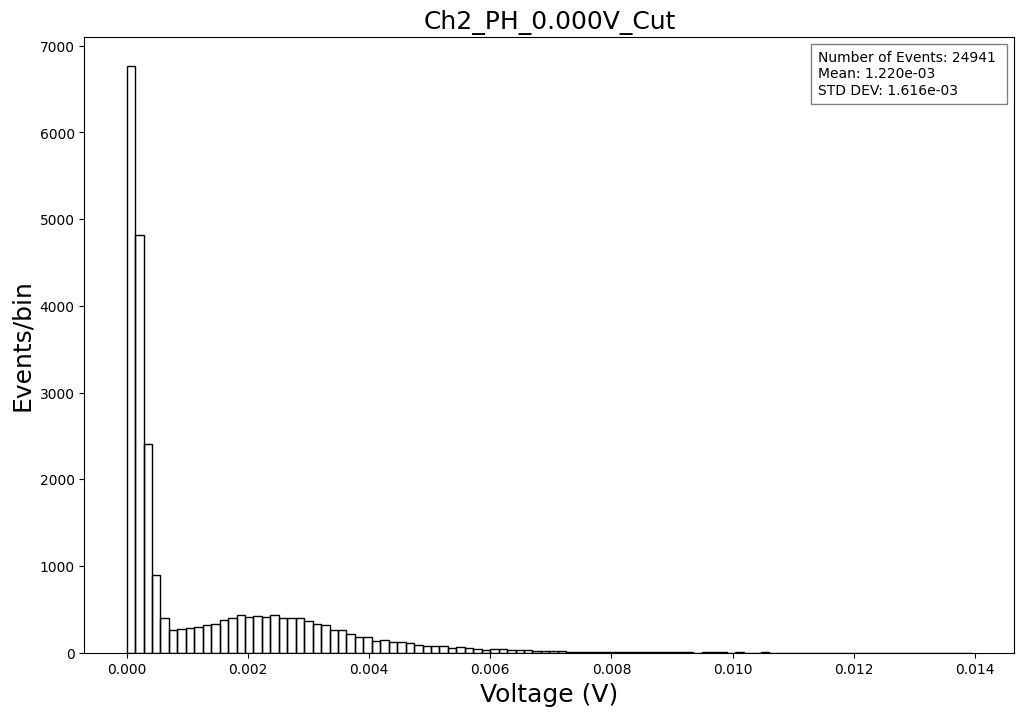

Bin width =  0.00013949216875
N =  24941


In [23]:
if(Squares.find("2") != -1):
    

    
    fig, ax = plt.subplots(figsize=[12,8])
    n, bins, patches = ax.hist(T2, 100, fill=False)
    #Line below is used to obtain bin edge locations
    histo, bin_edges = np.histogram(T2, bins)
    #Line below uses knowledge of bin edge locations to find bin centers
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    

    
    #coeff, var_matrix = curve_fit(gauss, bin_centers[width2[0]:width[0]], histo[width2[0]:width[0]], p0=[55,np.mean(T2),100e-4])
    


    #defines the range of x-axis over which to place the fit curve
    #Use the mean calculated above to make initial guess at sensible values
    #adjust as necessary
    #vars = np.linspace(bin_edges[width2] ,bin_edges[width])
    #hist_fit = gauss(vars,*coeff)
    #plt.plot(vars,hist_fit, 'r', linewidth=2)
    plt.title("Ch2_PH_%0.3fV_Cut" %(Noise), fontsize = "18")
    plt.xlabel('Voltage (V)', fontsize ='18')
    plt.ylabel('Events/bin', fontsize ='18')
    #plt.yscale("log")
    #plt.ylim(1,10**5,)
    text_box = AnchoredText("Number of Events: %d \nMean: %0.3e \nSTD DEV: %0.3e" %(sum(histo), abs(np.mean(T2)), abs(np.std(T2))), frameon=True, loc=1, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    ax.add_artist(text_box)
    #plt.text(np.mean(T2) + (abs(coeff[2])*2), .9 *max(histo), 'Fitted sigma = {0:1.3e} \nKept Event % = {1:.2f}%'.format(abs(coeff[2]), percB),bbox=dict(facecolor='white', alpha=1))
    #plt.xlim(np.mean(T2)-(abs(coeff[2])*6),np.mean(T2)+(abs(coeff[2])*6))
    plt.savefig("Ch2_PH_%0.3fV_Cut.png" %(Noise))
    plt.show()
    #CFD time@level distro

    #print('Fitted mean = ', coeff[1])
    #print('Fitted sigma = ', coeff[2])
    print('Bin width = ', bin_edges[2] - bin_edges[1])
    print('N = ', len(t_cor2))

    #text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)
    
    histo = pd.DataFrame(histo)
    bin_centers = pd.DataFrame(bin_centers)
    histo.to_csv("Ch2_PH_%0.3fV_Cut_Histo" %(Noise), index = False)
    bin_centers.to_csv("Ch2_PH_%0.3fV_Cut_Bin_Centers" %(Noise), index = False)


In [24]:
if(Squares.find("3") != -1):
    histo, bin_edges = np.histogram(T3, 100)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    middle = np.where(histo == max(histo))[0]
    #width = (np.where(histo[middle[0]:99] == find_nearest(histo[middle[0]:99] , .5 * max(histo)))[0])+middle
    #width2 = np.where(histo[0:middle[0]] == find_nearest(histo[0:middle[0]] , .5 * max(histo)))[0]

In [25]:
if(Squares.find("3") != -1):
    

    
    fig, ax = plt.subplots(figsize=[12,8])
    n, bins, patches = plt.hist(T3, 100, fill=False)
    #Line below is used to obtain bin edge locations
    histo, bin_edges = np.histogram(T3, bins)
    #Line below uses knowledge of bin edge locations to find bin centers
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    

    
    #coeff, var_matrix = curve_fit(gauss, bin_centers[width2[0]:width[0]], histo[width2[0]:width[0]], p0=[55,np.mean(T3),100e-4])
    


    #defines the range of x-axis over which to place the fit curve
    #Use the mean calculated above to make initial guess at sensible values
    #adjust as necessary
    #vars = np.linspace(bin_edges[width2], bin_edges[width])
    #hist_fit = gauss(vars,*coeff)
    #plt.plot(vars,hist_fit, 'r', linewidth=2)
    plt.title("Ch3_PH_%0.3fV_Cut" %(Noise), fontsize = "18")
    plt.xlabel('Voltage (V)', fontsize ='18')
    plt.ylabel('Events/bin', fontsize ='18')
    text_box = AnchoredText("Number of Events: %d \nMean: %0.3e \nSTD DEV: %0.3e" %(sum(histo), abs(np.mean(T3)), abs(np.std(T3))), frameon=True, loc=1, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    ax.add_artist(text_box)
    #plt.text(np.mean(T2) + (abs(coeff[2])*2), .9 *max(histo), 'Fitted sigma = {0:1.3e} \nKept Event % = {1:.2f}%'.format(abs(coeff[2]), percB),bbox=dict(facecolor='white', alpha=1))
    #plt.xlim(np.mean(T2)-(abs(coeff[2])*6),np.mean(T2)+(abs(coeff[2])*6))
    plt.savefig("Ch3_PH_%0.3fV_Cut.png" %(Noise))
    plt.show()
    #CFD time@level distro

    #print('Fitted mean = ', coeff[1])
    #print('Fitted sigma = ', coeff[2])
    #print('Bin width = ', bin_edges[2] - bin_edges[1])
    #print('N = ', len(t_cor3))

    #text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)
    
    histo = pd.DataFrame(histo)
    bin_centers = pd.DataFrame(bin_centers)
    histo.to_csv("Ch3_PH_%0.3fV_Cut_Histo" %(Noise), index = False)
    bin_centers.to_csv("Ch3_PH_%0.3fV_Cut_Bin_Centers" %(Noise), index = False)
    

In [26]:
if(Squares.find("4") != -1):
    histo, bin_edges = np.histogram(T4, 1000)
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    middle = np.where(histo == max(histo))[0]
    #width = (np.where(histo[middle[0]:999] == find_nearest(histo[middle[0]:999] , .5 * max(histo)))[0])+middle
    #width2 = np.where(histo[0:middle[0]] == find_nearest(histo[0:middle[0]] , .5 * max(histo)))[0]

In [27]:
if(Squares.find("4") != -1):
    

    
    fig, ax = plt.subplots(figsize=[12,8])
    n, bins, patches = plt.hist(T4, 1000, fill=False)
    #Line below is used to obtain bin edge locations
    histo, bin_edges = np.histogram(T4, bins)
    #Line below uses knowledge of bin edge locations to find bin centers
    bin_centers = (bin_edges[:-1]+bin_edges[1:])/2
    

    
    #coeff, var_matrix = curve_fit(gauss, bin_centers[width2[0]:width[0]], histo[width2[0]:width[0]], p0=[55,np.mean(T4),100e-5])
    


    #defines the range of x-axis over which to place the fit curve
    #Use the mean calculated above to make initial guess at sensible values
    #adjust as necessary
    #vars = np.linspace(bin_edges[width2], bin_edges[width])
    #hist_fit = gauss(vars,*coeff)
    #plt.plot(vars,hist_fit, 'r', linewidth=2)
    plt.title("Ch4_PH_%0.3fV_Cut" %(Noise), fontsize = "18")
    plt.xlabel('Voltage (V)', fontsize ='18')
    plt.ylabel('Events/bin', fontsize ='18')
    #plt.yscale("log")
    text_box = AnchoredText("Number of Events: %d \nMean: %0.3e \nSTD DEV: %0.3e" %(sum(histo), abs(np.mean(T4)), abs(np.std(T4))), frameon=True, loc=1, pad=0.5)
    plt.setp(text_box.patch, facecolor='white', alpha=0.5)
    ax.add_artist(text_box)
    #plt.text(np.mean(T2) + (abs(coeff[2])*2), .9 *max(histo), 'Fitted sigma = {0:1.3e} \nKept Event % = {1:.2f}%'.format(abs(coeff[2]), percB),bbox=dict(facecolor='white', alpha=1))
    #plt.xlim(np.mean(T2)-(abs(coeff[2])*6),np.mean(T2)+(abs(coeff[2])*6))
    plt.savefig("Ch4_PH_%0.3fV_Cut.png" %(Noise))
    plt.show()
    #CFD time@level distro

    #print('Fitted mean = ', coeff[1])
    #print('Fitted sigma = ', coeff[2])
    print('Bin width = ', bin_edges[2] - bin_edges[1])
    print('N = ', len(t_cor4))

    #text(0.1, 0.9,'matplotlib', ha='center', va='center', transform=ax.transAxes)
    
    histo = pd.DataFrame(histo)
    bin_centers = pd.DataFrame(bin_centers)
    histo.to_csv("Ch4_PH_%0.3fV_Cut_Histo" %(Noise), index = False)
    bin_centers.to_csv("Ch4_PH_%0.3fV_Cut_Bin_Centers" %(Noise), index = False)
    


In [28]:
bin_centers

,0
0,0.000072
1,0.000211
2,0.000351
3,0.000490
4,0.000630
...,...
95,0.013323
96,0.013463
97,0.013602
98,0.013742
